In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = make_blobs(n_samples=20, centers=[[1,1], [4,4]])

In [23]:
data

(array([[ 3.8586922 ,  4.00140721],
        [ 5.43090651,  3.59149156],
        [ 3.44326866,  2.65454116],
        [-0.60023493,  1.43529484],
        [-1.20291172,  2.46113333],
        [-0.13955221,  1.17491794],
        [ 5.78567258,  3.60830223],
        [-0.83245243,  0.04700463],
        [ 0.89039659,  1.34114498],
        [ 3.03076996,  4.47126318],
        [ 2.33451558,  1.27516698],
        [ 2.35450603,  0.20985066],
        [ 3.88924602,  3.79988986],
        [ 4.59024431,  2.93456193],
        [ 2.02032073,  2.18367812],
        [ 2.01666461,  1.35375048],
        [ 0.4966305 ,  0.71215718],
        [ 5.97158062,  3.52156524],
        [ 3.34757889,  4.72011663],
        [ 4.88451188,  3.6334014 ]]),
 array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]))

In [24]:
df = pd.DataFrame(data[0], columns = ["X", "Y"])
df["Target"] = data[1]

In [25]:
df.head()

,X,Y,Target
0,3.858692,4.001407,1
1,5.430907,3.591492,1
2,3.443269,2.654541,1
3,-0.600235,1.435295,0
4,-1.202912,2.461133,0


In [29]:
X = data[0]
y = data[1]

In [32]:
a = df[df["Target"]==0]
b = df[df["Target"]==1]

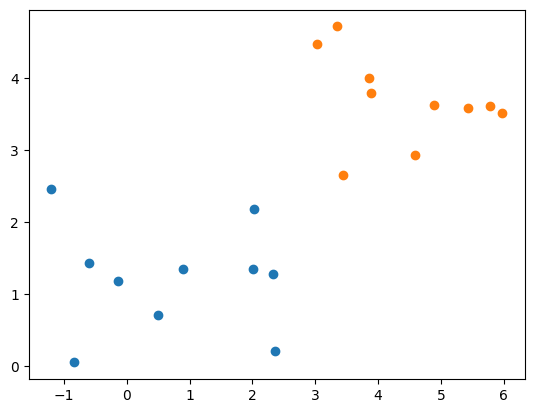

In [33]:
plt.scatter(a["X"], a["Y"])
plt.scatter(b["X"], b["Y"])
plt.show()

In [34]:
k=2

In [35]:
c0 = np.array([0,2.3])
c1 = np.array([5, 5.2])

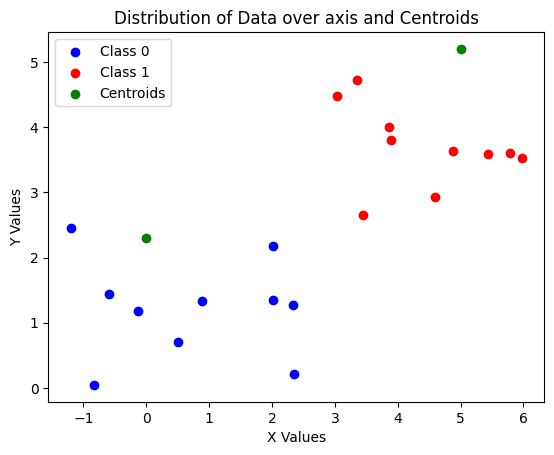

In [41]:
plt.scatter(a["X"], a["Y"], color="blue", label="Class 0")
plt.scatter(b["X"], b["Y"], color="red", label="Class 1")
plt.scatter([0, 5], [2.3, 5.2], color="green", label="Centroids")
plt.legend()
plt.title("Distribution of Data over axis and Centroids")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

In [46]:
np.sqrt(np.sum(np.square(c0 - df.iloc[0,:2])))

4.217142636001473

In [47]:
# c0 ---> 0, 2.3
# df ---> 3.858692, 4.001407
x1 = 0
y1 = 2.3
x2 = 3.858692
y2 = 4.001407

In [48]:
np.sqrt(((x2-x1)**2)+((y2-y1)**2))

4.217142365454716

In [ ]:
dist_c0 = np.sqrt(np.square(c0[0]-df["X"]) + np.square(c0[1]-df["Y"]))

dist_c1 = np.sqrt(np.square(c1[0]-df["X"]) + np.square(c1[1]-df["Y"]))

In [54]:
new_df = df

In [55]:
new_df["dist_c0"] = dist_c0
new_df["dist_c1"] = dist_c1

In [56]:
new_df

,X,Y,Target,dist_c0,dist_c1
0,3.858692,4.001407,1,4.217143,1.655055
1,5.430907,3.591492,1,5.582356,1.665227
2,3.443269,2.654541,1,3.461473,2.983752
3,-0.600235,1.435295,0,1.052614,6.748010
4,-1.202912,2.461133,0,1.213656,6.780671
5,-0.139552,1.174918,0,1.133704,6.528115
6,5.785673,3.608302,1,5.931750,1.775045
7,-0.832452,0.047005,0,2.401867,7.782728
8,0.890397,1.341145,0,1.308514,5.637340
9,3.030770,4.471263,1,3.728264,2.099744


In [61]:
np.argmin(new_df[["dist_c0", "dist_c1"]].loc[0])

1

In [62]:
new_class = [np.argmin(new_df[["dist_c0", "dist_c1"]].loc[i]) for i in range(20)]

In [63]:
new_class

[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]

In [64]:
np.argmin([1,5,4,0,7,8,9])

3

In [65]:
np.argmax([1,5,4,0,7,8,9])

6

In [69]:
new_df["cluster"] = new_class

In [70]:
new_df

,X,Y,Target,dist_c0,dist_c1,cluster
0,3.858692,4.001407,1,4.217143,1.655055,1
1,5.430907,3.591492,1,5.582356,1.665227,1
2,3.443269,2.654541,1,3.461473,2.983752,1
3,-0.600235,1.435295,0,1.052614,6.748010,0
4,-1.202912,2.461133,0,1.213656,6.780671,0
5,-0.139552,1.174918,0,1.133704,6.528115,0
6,5.785673,3.608302,1,5.931750,1.775045,1
7,-0.832452,0.047005,0,2.401867,7.782728,0
8,0.890397,1.341145,0,1.308514,5.637340,0
9,3.030770,4.471263,1,3.728264,2.099744,1


In [72]:
cluster0_mean = new_df[new_df["cluster"]==0].mean()
cluster1_mean = new_df[new_df["cluster"]==1].mean()

In [77]:
new_c0 = cluster0_mean[:2]

In [78]:
new_c1 = cluster1_mean[:2]

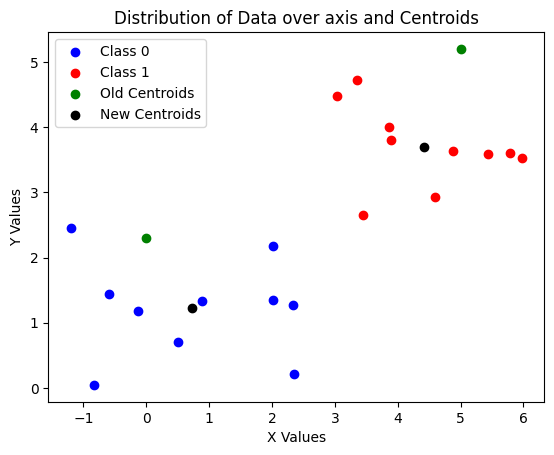

In [79]:
plt.scatter(a["X"], a["Y"], color="blue", label="Class 0")
plt.scatter(b["X"], b["Y"], color="red", label="Class 1")
plt.scatter([0, 5], [2.3, 5.2], color="green", label="Old Centroids")
plt.scatter([new_c0[0], new_c1[0]], [new_c0[1], new_c1[1]], 
            color="black", label="New Centroids")
plt.legend()
plt.title("Distribution of Data over axis and Centroids")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

In [80]:
new_dist_c0 = np.sqrt(np.square(new_c0[0]-df["X"]) + np.square(new_c0[1]-df["Y"]))

new_dist_c1 = np.sqrt(np.square(new_c1[0]-df["X"]) + np.square(new_c1[1]-df["Y"]))

In [81]:
new_df["new_dist_c0"] = new_dist_c0
new_df["new_dist_c1"] = new_dist_c1

In [82]:
new_df

,X,Y,Target,dist_c0,dist_c1,cluster,new_dist_c0,new_dist_c1
0,3.858692,4.001407,1,4.217143,1.655055,1,4.183842,0.642989
1,5.430907,3.591492,1,5.582356,1.665227,1,5.262099,1.012825
2,3.443269,2.654541,1,3.461473,2.983752,1,3.066086,1.428325
3,-0.600235,1.435295,0,1.052614,6.748010,0,1.351379,5.507773
4,-1.202912,2.461133,0,1.213656,6.780671,0,2.300583,5.759581
5,-0.139552,1.174918,0,1.133704,6.528115,0,0.874473,5.211830
6,5.785673,3.608302,1,5.931750,1.775045,1,5.588232,1.365096
7,-0.832452,0.047005,0,2.401867,7.782728,0,1.956437,6.396908
8,0.890397,1.341145,0,1.308514,5.637340,0,0.198357,4.244447
9,3.030770,4.471263,1,3.728264,2.099744,1,3.981291,1.594888


In [83]:
new_class = [np.argmin(new_df[["new_dist_c0", "new_dist_c1"]].loc[i]) for i in range(20)]

In [84]:
new_df["new_cluster"] = new_class

In [85]:
new_df.head()

,X,Y,Target,dist_c0,dist_c1,cluster,new_dist_c0,new_dist_c1,new_cluster
0,3.858692,4.001407,1,4.217143,1.655055,1,4.183842,0.642989,1
1,5.430907,3.591492,1,5.582356,1.665227,1,5.262099,1.012825,1
2,3.443269,2.654541,1,3.461473,2.983752,1,3.066086,1.428325,1
3,-0.600235,1.435295,0,1.052614,6.748010,0,1.351379,5.507773,0
4,-1.202912,2.461133,0,1.213656,6.780671,0,2.300583,5.759581,0


In [87]:
cluster0_mean = new_df[new_df["new_cluster"]==0].mean()
cluster1_mean = new_df[new_df["new_cluster"]==1].mean()

In [92]:
new_new_c0 = cluster0_mean[:2]

In [93]:
new_new_c1 = cluster1_mean[:2]

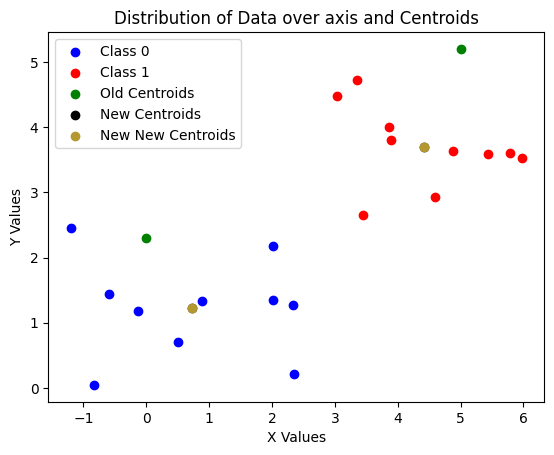

In [100]:
plt.scatter(a["X"], a["Y"], color="blue", label="Class 0")
plt.scatter(b["X"], b["Y"], color="red", label="Class 1")
plt.scatter([0, 5], [2.3, 5.2], color="green", label="Old Centroids")
plt.scatter([new_c0[0], new_c1[0]], [new_c0[1], new_c1[1]], 
            color="black", label="New Centroids")
plt.scatter([new_new_c0[0], new_new_c1[0]], [new_new_c0[1], new_new_c1[1]], 
            color="#B49930", label="New New Centroids")
plt.legend()
plt.title("Distribution of Data over axis and Centroids")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()